In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=1a248e419c93b2c4602fd0829c85a11c2b62c077c0ae765fa2813109f8353488
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [2]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import wget
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Please add necessary imports here
import nltk
nltk.download('omw-1.4')

from nltk import word_tokenize
from nltk.stem import *
from nltk.corpus import stopwords

from string import punctuation

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
filename = wget.download("https://github.com/MIE451-2021/course-datasets/raw/main/20_newsgroups.zip", "20_newsgroups.zip")
!unzip 20_newsgroups.zip
DATA_DIR = "20_newsgroups"

## Functions from lab

**PLEASE DO NOT CHANGE FUNCTION/CLASS NAMES**

**PLEASE DO NOT CHANGE/OVERWRITE COMPLETED FUNCTIONS**

In [13]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

In [14]:
def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [15]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [16]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

## Q1

In [17]:
def clean_file_text_improved(text):
    new_text = re.sub("Reply-To:.*?\n", "", text)


    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

In [18]:
def corpus_count_words_stops(file_list):
    # set stopwords
    stops = set(stopwords.words('english'))

    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text_improved(file_data)
            file_words = tokenizer.tokenize(file_data)

            total_words = [word for word in file_words if word.lower() not in stops and word.isalpha()]
            word_counter.update(total_words)
    return word_counter

In [19]:
class MLQ1():
    def binary_baseline_data(self, file_list, num_words=1000):
        # Calculate word count in corpus
        news_cnt = corpus_count_words(file_list)

        # Select the most common numWords
        word_list = [word for (word, freq) in news_cnt.most_common(num_words)]

        # Create a binary encoding of dataset based on the selected features (X)
        tokenizer = RegexpTokenizer(r'\w+')
        df_rows = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_data = file.read()
                file_data = clean_file_text(file_data)
                file_words = tokenizer.tokenize(file_data)
                df_rows.append([1 if word in file_words else 0 for word in word_list])
        X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

        # Create a dataframe of targets (y)
        y = [get_target(get_topic_name(file_path)) for file_path in file_list]

        return X, y

    def binary_improved_data(self, file_list, num_words=1000):
        # Put your code here for Q1b
        # Make sure you update the variable features and targets below

        # set stopwords
        stops = set(stopwords.words('english'))

        news_cnt = corpus_count_words_stops(file_list)

        # Select the most common numWords
        word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
        

        # Create a binary encoding of dataset based on the selected features (X)
        tokenizer = RegexpTokenizer(r'\w+')
        df_rows = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_data = file.read()
                file_data = clean_file_text_improved(file_data)

                # only tokenized words that are not in the stopwords list
                file_words = tokenizer.tokenize(file_data)
                file_words = [word for word in file_words if word.lower() not in stops and word.isalpha()]

                df_rows.append([1 if word in file_words else 0 for word in word_list])

        X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

        # Create a dataframe of targets (y)
        y = [get_target(get_topic_name(file_path)) for file_path in file_list]

        # Please remember to put index for your dataframe as the file name
        # For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])

        # validate return types
        assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"

        return X, y

    def train_and_predict_baseline(self, file_list):
        # get the baseline data
        X, y = self.binary_baseline_data(file_list)

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        return X, y, train_accuracy, test_accuracy

    def train_and_predict_improved(self, file_list):
        # get the improved data
        X, y = self.binary_improved_data(file_list)

        # Write your code here for Q1c:
        # You need to split the data and train a logistic regression classifier.
        # Then, you need to calculate the variables train_accuracy and test_accuracy for the new classifier

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        return X, y, train_accuracy, test_accuracy


    @staticmethod
    def random_mean_ci(X, y, num_tests):
        # train_results is a list of train accuracy results for the differrent random splits of the dataset
        train_results = []

        # test_results is a list of test accuracy results for the differrent random splits of the dataset
        test_results = []

        # Write your code here for Q1d
        for i in range(num_tests):
          state = random.randint(1,1000)
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
          clf = LogisticRegression(C=1.0).fit(X_train, y_train)

          y_train_predict = clf.predict(X_train)
          y_test_predict = clf.predict(X_test)

          train_accuracy = accuracy_score(y_train, y_train_predict)
          test_accuracy = accuracy_score(y_test, y_test_predict)
          
          train_results.append(train_accuracy)
          test_results.append(test_accuracy)
      

        # calculate the train mean and the 95% confidence interval for the list of results
        train_mean = np.mean(train_results)
        train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))

        # calculate the test mean and the 95% confidence interval for the list of results
        test_mean = np.mean(test_results)
        test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))

        # validate return types
        assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
        assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"

        return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

    @staticmethod
    def random_cm(X, y, num_tests):
        # cm_list is a list of confusion matrices for the different random splits of the dataset
        cm_list = []

        # Write your code here for Q1f
        for i in range(num_tests):
          state = random.randint(1,1000)
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
          clf = LogisticRegression(C=1.0).fit(X_train, y_train)

          y_train_predict = clf.predict(X_train)
          y_test_predict = clf.predict(X_test)

          train_accuracy = accuracy_score(y_train, y_train_predict)
          test_accuracy = accuracy_score(y_test, y_test_predict)
          
          cm = confusion_matrix(y_test, y_test_predict)
          cm_list.append(cm)

        # sum the confusion matrices and return the combined confusion matrix
        combined_cm = np.array(cm_list).sum(axis=0)

        # validate return type
        assert isinstance(combined_cm, np.ndarray), "return type"

        return combined_cm



Please do not change this global variable

In [20]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [21]:
q1 = MLQ1()
X, y, train_accuracy, test_accuracy = q1.train_and_predict_baseline(all_files)
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9510609416303494
Test accuracy: 0.6843333333333333


### Q1 (a)


In [22]:
print("total number of files", len(all_files), ". Count of uniqus words in corpus", len(corpus_count_words(all_files)))

total number of files 19997 . Count of uniqus words in corpus 232013


In this baseline, the feature set is a set of 1000 most frequent words chosen from the 20 newsgroup dataset. 

There are 19997 files and 232013 unique words in the corpus, but the baseline function only chose the most common 1000 words. 

The hyperparameters used in this base line is C within the logistic regression classifier, which indicates the inverse of regularization strength to prevent overfitting. In this baseline, C was set to 1.0.

### Q1 (b)

Implement *binary_improved_data*

### Q1 (c)

Implement *train_and_predict_improved*

In [23]:
q1 = MLQ1()
X, y, train_accuracy, test_accuracy = q1.train_and_predict_improved(all_files)
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))


Train accuracy: 0.9822819175537615
Test accuracy: 0.9468333333333333


Yes, both traing and testing accuracy increased. Training accuracy increased from 0.951 to 0.982 while testing accuracy increased from 0.6843 to 0.9468.

### Q1 (d)

Implement *random_mean_ci*


### Q1 (e)

Use the following code to calculate the mean accuracy and 95% confidence interval over 10 random splits

In [24]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = MLQ1.random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.981596056297778
Train confidence interval over 10 random splits: [0.9812418066725672, 0.9819503059229888]
Test mean accuracy over 10 random splits: 0.9465833333333334
Test confidence interval over 10 random splits: [0.9455650523477571, 0.9476016143189098]


The 95% confidence interval means that we are 95% confident that the population true mean locates in the interval. The results showed that both train and test mean accuracy are located in the interval, which demonstrated the split of each iteration are able to capture the true mean. This is more informative since it proved the model are able to generalize different split of data by doing statistical sampling.


### Q1 (f)

Implement *random_cm*


### Q1 (g)

Use the following code to produce a confusion matrix for 10 random splits

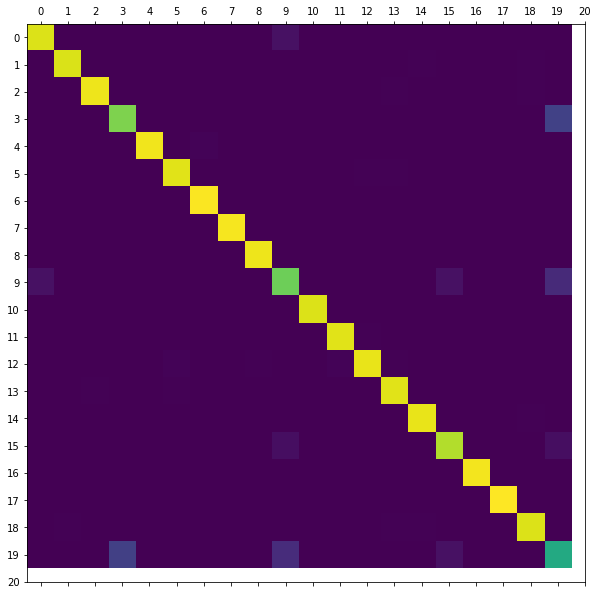

In [25]:
cm10 = MLQ1.random_cm(X, y, num_tests = 10)
plot_confusion_matrix(cm10)

Yes, class 3 and class 9 are more easily confused with class 19.

class 3 and class 19 are related to religion so can be easily misclassified. class 9 is about politics.misc while class 19 is about religion.misc. Sometics politics conclude religion and may lead to a misclassification.

## Q2

In [26]:
class MLQ2():
    def feature_num(self, X, y):
        # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
        # where numFeatures is the number of words used as features
        result_list = []

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        for p in [0.1, 0.3, 0.5, 0.75, 0.85, 1.0]:
            subset_size = int(p*X.shape[1])
            X_train_subset = X_train.iloc[:, 0:subset_size]
            X_test_subset = X_test.iloc[:, 0:subset_size]
            # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
            # ......

            clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

            y_train_predict = clf.predict(X_train_subset)
            y_test_predict = clf.predict(X_test_subset)

            train_accuracy = accuracy_score(y_train, y_train_predict)
            test_accuracy = accuracy_score(y_test, y_test_predict)


            # add to result_list
            result_list.append((p, train_accuracy, test_accuracy))

        # Make a dataframe of the results
        result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])

        # validate return type
        assert isinstance(result_df, pd.DataFrame), "return type"

        return result_df

### Q2 (a)

Implement *feature_num*

### Q2 (b)

Use the following code to plot the train and test accuracy for the different feature sets sizes

<AxesSubplot:xlabel='num_features'>

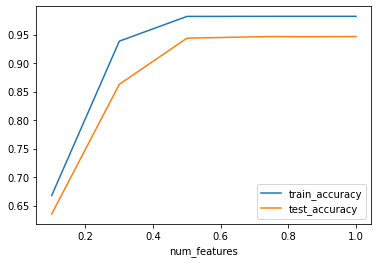

In [27]:
q2 = MLQ2()
feature_num_df = q2.feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

As number of features increased, the overall accuracy of both training set and test set increased.

## Q3

In [28]:
class MLQ3():
    def hyperparameter(self, X, y):
        # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
        # where numFeatures is the number of words used as features
        result_list = []

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
            # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
            # ......
            clf = LogisticRegression(C=param).fit(X_train, y_train)

            y_train_predict = clf.predict(X_train)
            y_test_predict = clf.predict(X_test)

            train_accuracy = accuracy_score(y_train, y_train_predict)
            test_accuracy = accuracy_score(y_test, y_test_predict)

            # add to result_list
            result_list.append((param, train_accuracy, test_accuracy))

        # Make a dataframe of the results
        result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])

        # validate return type
        assert isinstance(result_df, pd.DataFrame), "return type"

        return result_df

### Q3 (a)

Implement *hyperparameter*

### Q3 (b)

Use the following code to plot the train and test accuracy for the different the parameters

<AxesSubplot:xlabel='param'>

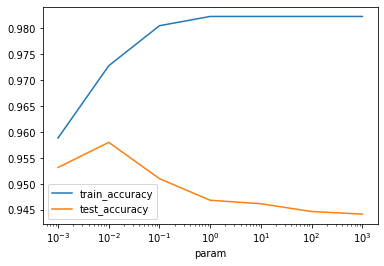

In [29]:
q3 = MLQ3()
param_df = q3.hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

As the value of the hyperparameter (C) increased, the test accuracy first increased to 0.958 then decreased after C reached 0.01, this is because smaller C value specify stronger regularization to prevent the model overfitting. (higher C has lower weight to the complexity penalty and leads to overfitting)

## Q4

In [30]:
class MLQ4():
    def tf_improved_data(self, file_list, num_words = 1000):
        # Put your code here
        # Make sure you update the variable features and targets below

        # set stopwords
        stops = set(stopwords.words('english'))

        news_cnt = corpus_count_words_stops(file_list)

        # Select the most common numWords
        word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
        

        # Create a binary encoding of dataset based on the selected features (X)
        tokenizer = RegexpTokenizer(r'\w+')
        df_rows = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_data = file.read()
                file_data = clean_file_text_improved(file_data)

                # only tokenized words that are not in the stopwords list
                file_words = tokenizer.tokenize(file_data)
                file_words = [word for word in file_words if word.lower() not in stops and word.isalpha()]

                df_rows.append([file_words.count(word) for word in word_list])

        X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

        # Create a dataframe of targets (y)
        y = [get_target(get_topic_name(file_path)) for file_path in file_list]

        # Please remember to put index for your dataframe as the file name
        # For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
        # validate return types
        assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"

        return X, y


### Q4 (a)

Implement *tf_improved_data*

### Q4 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [31]:
q4 = MLQ4()
X_tf, y_tf = q4.tf_improved_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = MLQ1.random_mean_ci(X_tf, y_tf, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9815031792526969
Train confidence interval over 10 random splits: [0.9805173138034778, 0.982489044701916]
Test mean accuracy over 10 random splits: 0.9359
Test confidence interval over 10 random splits: [0.9340121898597289, 0.937787810140271]


The results showed that the binary encoding performed better than term frequency encoding. Both train and test mean accuracy of binary are higher than term frequency encoding. 

This may because term frequency would treat rare and frequent words equally. It may consider a high frequent words with less relevance with higher weights in term frequency encoding but less weights on true relevant words.

## Q5

In [32]:
class MLQ5():
    def nb_random_mean_ci(self, X, y, num_tests):
        # train_results is a list of train accuracy results for the differrent random splits of the dataset
        train_results = []

        # test_results is a list of test accuracy results for the differrent random splits of the dataset
        test_results = []

        # Write your code here
        for i in range(num_tests):
          state = random.randint(1,1000)
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)

          # naive Bayes algorithm for multinomially distributed data - multinominal NB
          clf = MultinomialNB().fit(X_train, y_train)

          y_train_predict = clf.predict(X_train)
          y_test_predict = clf.predict(X_test)

          train_accuracy = accuracy_score(y_train, y_train_predict)
          test_accuracy = accuracy_score(y_test, y_test_predict)
          
          train_results.append(train_accuracy)
          test_results.append(test_accuracy)
        

        # calculate the train mean and the 95% confidence interval for the list of results
        train_mean = np.mean(train_results)
        train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))

        # calculate the test mean and the 95% confidence interval for the list of results
        test_mean = np.mean(test_results)
        test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))

        # validate return types
        assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
        assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"

        return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high


### Q5 (a)

Implement *nb_random_mean_ci*


### Q5 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [33]:
q5 = MLQ5()
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = q5.nb_random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9312781310280774
Train confidence interval over 10 random splits: [0.9302264589750233, 0.9323298030811316]
Test mean accuracy over 10 random splits: 0.9098499999999999
Test confidence interval over 10 random splits: [0.9069494020144167, 0.9127505979855832]


The result showed the logistics regression performed better than naive bayes classifier. This may because logistics regression is a discriminative model while naive bayes is a generative model. Also we have a large amount of data that allowed logistics model performed well.

## Q6

In [34]:
class MLQ6():
    def binary_med_data(self, file_list, num_words = 1000):
        # Put your code here
        # Make sure you update the variable features and targets below


        # index of sci-med = 8
        # set stopwords
        stops = set(stopwords.words('english'))

        news_cnt = corpus_count_words_stops(file_list)

        # Select the most common numWords
        word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
        

        # Create a binary encoding of dataset based on the selected features (X)
        tokenizer = RegexpTokenizer(r'\w+')
        df_rows = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_data = file.read()
                file_data = clean_file_text_improved(file_data)

                # only tokenized words that are not in the stopwords list
                file_words = tokenizer.tokenize(file_data)
                file_words = [word for word in file_words if word.lower() not in stops and word.isalpha()]

                df_rows.append([1 if word in file_words else 0 for word in word_list])

        X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

        # Create a dataframe of targets (y)
        y = [1 if get_target(get_topic_name(file_path)) == 8 else 0 for file_path in file_list ]

        # Please remember to put index for your dataframe as the file name
        # For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])

        # validate return types
        assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"

        return X, y

### Q6 (a)

Implement *binary_med_data*


### Q6 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [35]:
q6 = MLQ6()
X, y = q6.binary_med_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = MLQ1.random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9997428020290062
Train confidence interval over 10 random splits: [0.9996520145980629, 0.9998335894599496]
Test mean accuracy over 10 random splits: 0.9990166666666667
Test confidence interval over 10 random splits: [0.9987818856480544, 0.999251447685279]


The 95% confidence interval means that we are 95% confident that the population true mean locates in the interval. The results showed that both train and test mean accuracy are located in the interval, which demonstrated the split of each iteration are able to capture the true mean. This is more informative since it proved the model are able to generalize different split of data by doing statistical sampling.

Compared to Mulitclass logistic regression, binary logistic regression has a higher accuracy on both training and testing.

# Q7

## Q7(a)
use the following code cell to implement your feature encoding

In [74]:
def data_q7(file_list, num_words = 1000):
  # set stopwords
  stops = set(stopwords.words('english'))

  news_cnt = corpus_count_words_stops(file_list)

  # Select the most common numWords
  word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
  

  # Create a binary encoding of dataset based on the selected features (X)
  tokenizer = RegexpTokenizer(r'\w+')
  df_rows = []
  for file_path in file_list:
      with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
          file_data = file.read()
          file_data = clean_file_text_improved(file_data)

          # only tokenized words that are not in the stopwords list
          file_words = tokenizer.tokenize(file_data)
          file_words = [word for word in file_words if word.lower() not in stops and word.isalpha()]

          df_rows.append([1 if word in file_words else 0 for word in word_list])

  X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)

  # Create a dataframe of targets (y)
  y = [get_target(get_topic_name(file_path)) for file_path in file_list]

  # Please remember to put index for your dataframe as the file name
  # For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])

  # validate return types
  assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"

  return X, y

## Q7(b)
Use the following code cell to implement your model

In [75]:
def build_model_q7():
  #write your code here, define your model
  
  MODELQ7=LogisticRegression(C=0.01)
  return MODELQ7

Code for evaluating p at k

In [76]:
def calculate_average_precision_at_k(MODELQ7, all_files, training_files, testing_files,k=None):
  
  training_files = [str(f) for f in open(training_files,mode='r').read().splitlines()]
  testing_files = [str(f) for f in open(testing_files,mode='r').read().splitlines()]
  if k is None:
    k=len(testing_files)

  X, y = data_q7(all_files) 
  X['gt'] = y
  training = X.loc[training_files]
  X_train = training.loc[:,training.columns!='gt']
  y_train = training['gt'].values

  testing = X.loc[testing_files]
  X_test = testing.loc[:,testing.columns!='gt']
  y_test = testing['gt'].values

  MODELQ7.fit(X_train,y_train)
  y_pred = MODELQ7.predict(X_test)
  y_pred_prob = MODELQ7.predict_proba(X_test)
  confidences = np.max(y_pred_prob,axis=1)
  
  p_at_k = []
  rel_at_k = []
  confidence_order = np.argsort(confidences)
  for i in range(1,k+1):
    top_confidence = confidence_order[-i:]
    pred_top_i = y_pred[top_confidence]
    gt_top_i = np.array(y_test)[top_confidence]
    p_at_i = np.sum(pred_top_i == gt_top_i)/i
    rel_at_i = (pred_top_i[0] == gt_top_i[0])
    p_at_k.append(p_at_i)
    rel_at_k.append(rel_at_i)
  print('average precision at {} is {}'.format(k,np.dot(p_at_k,rel_at_k)/k))
  return np.dot(p_at_k,rel_at_k)/k

In [77]:
# Example usage:
######This line of code must be able to run on Google Colab in under 15 minutes.#####
######Code that runs longer than 15 minutes on the autograder will receive 0 marks for Q7#####
m = calculate_average_precision_at_k(build_model_q7(), all_files, 'training_files_Q7.txt', 'testing_files_Q7.txt')

average precision at 4000 is 0.9299237588844036


# Q7(c)

The chosen feature set is a set of 1000 most frequent words.

Feature encoding: binary encoding

Machine Learning Model: logistic regression classifier with C = 0.01

Average precision: 0.9299

Compared to feature set with 500 words, the set with 1000 frequent words has a higher average precision score. (0.9287 vs. 0.9299). Then average precision score is getting worse as the size of the feature set is increasing. This may because of overfitting due to too many features.

By comparing the previous analyses and adjustments, the test accuracy of binary encoding was generally higher than term frequency encoding. Hence we chose binary encoding in our model.

Furthermore, by comparing the results of logistic regression and Naive Bayes classifier, the performance of logistics regression classifier was better. Besides, through the plot shown in Q3, the test accuracy was highest when hyperparameter C reached 0.01. Therefore, we use logistic regression classifier with hyperparameter C=0.01 as our machine learning model.

